# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tqdm, glob

%matplotlib inline

/Users/remipetitpierre/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


# Functions

In [2]:
def displayCols(df):
    
    length = len(df)
    print('Length:', length)
    
    drop_cols = []
    for col in df.columns:
        col_presence = len(df.dropna(subset=[col]))/length
        if (col_presence < 0.01) or (len(df[col].dropna().astype(str).unique()) == 1):
            drop_cols.append(col)
        else:
            pbar = tqdm.tqdm(total=1000, desc=col.ljust(25))
            pbar.update(int(1000*col_presence))
            pbar.close()
            
    return df.drop(columns = drop_cols)

## Global variables

In [3]:
METADATA_PATH = '../../DATA/PREPROCESSED/metadata-v1-2.json'

# Code
## Load data

In [4]:
df = pd.read_json(METADATA_PATH)
len(df)

110562

In [5]:
df_ = df.drop(columns = ['pub_date', 'pub_place', 'pub_loc_lat', 'pub_loc_region',
              'pub_loc_country', 'pub_loc_lon', 'coverage_detail', 'pub_loc_detail',
              'coverage_lat', 'coverage_lon', 'coverage_lon', 'coverage_country', 'community_id']).rename(
    columns={'pub_date_m': 'publication_year', 'pub_loc_placename': 'publication_placename',
             'len': 'n_items', 'print': 'technique'})

## Columns

In [6]:
displayCols(df_[['uid', 'publication_year', 'publication_placename', 'coverage_placename',
                 'publisher', 'creator', 'scale', 'dimension', 'technique', 'n_items',
                 'institution', 'images_url']]);

Length: 110562


images_url               : 100%|██████████| 1000/1000 [00:00<00:00, 6026298.85it/s]


In [7]:
print('All fields complete: ', len(df.dropna()))

All fields complete:  1275


## Publication year

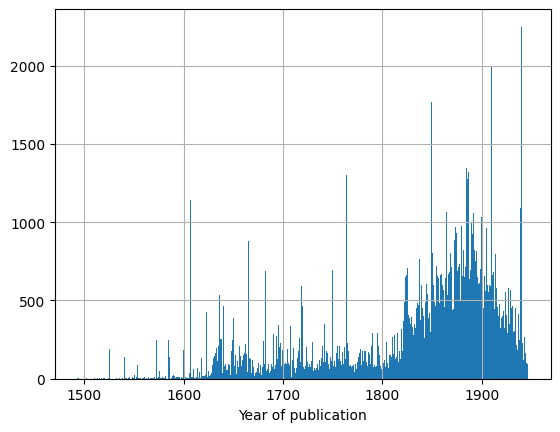

In [8]:
df['pub_date_m'].hist(bins = 455);
plt.xlabel('Year of publication');

### Publication place, conservation institution and location represented
#### Country of publication

In [9]:
df['pub_loc_country'].astype(str).value_counts()[:10]

pub_loc_country
['US']          40122
['FR']          36764
['DE']          13775
['NL']          10192
['ID']           5179
['CH']           4070
['GB', 'US']      101
['FR', 'US']       50
['CH', 'FR']       27
['DE', 'US']       26
Name: count, dtype: int64

#### Country of the geographical location covered

In [10]:
df['coverage_country'].astype(str).value_counts()[:15]

coverage_country
None      63199
['US']    17421
['FR']    12645
['DE']     2735
['CH']     2001
['IT']     1413
['EG']     1123
['NL']      941
['GB']      828
['CN']      500
['ES']      437
['GR']      387
['ID']      369
['PL']      365
['CA']      342
Name: count, dtype: int64

In [11]:
country_subset = df.dropna(subset=['pub_loc_country', 'coverage_country'])

ratio = np.sum(country_subset['pub_loc_country'] == country_subset['coverage_country'])/len(country_subset)
print(f"Proportion of the maps representing a location in the country where they were published: {ratio:.0%}")

Proportion of the maps representing a location in the country where they were published: 66%


#### Top publication cities

In [12]:
df['pub_loc_placename'].astype(str).value_counts()[:10]

pub_loc_placename
['Paris, France']             34451
['New York, NY, USA']         15557
['Philadelphia, PA, USA']      9924
['Amsterdam, Netherlands']     8439
['Berlin, Germany']            5194
['Jakarta, Indonesia']         4961
['Boston, MA, USA']            2639
['Leipzig, Germany']           2578
['Zürich, Switzerland']        1882
['Cologne, Germany']           1437
Name: count, dtype: int64

#### Top places covered

In [15]:
df['coverage_placename'].astype(str).value_counts()[1:12]

coverage_placename
['France']                   5037
['Île-de-France, France']    1796
['United States']            1730
['Europe']                   1471
['Germany']                  1345
['New Jersey, USA']          1045
['New York, NY, USA']        1036
['Egypt', 'Nile']             852
['Italy']                     722
['Paris, France']             687
['Africa']                    555
Name: count, dtype: int64

### Map scales

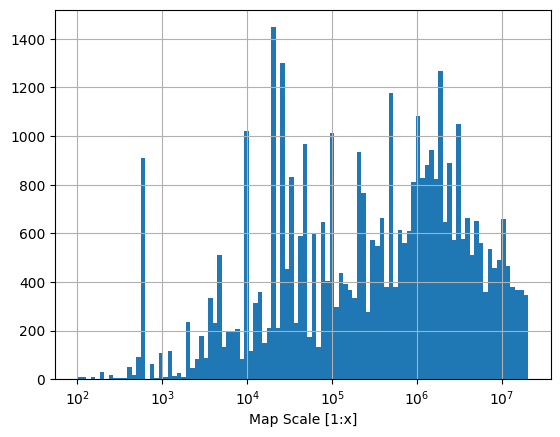

In [22]:
df['scale'].dropna().apply(np.mean).apply(np.log10).hist(bins=100, range=(2, 7.31));
plt.xticks([2, 3, 4, 5, 6, 7], [r'$10^2$', r'$10^3$', r'$10^4$', r'$10^5$', r'$10^6$', r'$10^7$']);
plt.xlabel('Map Scale [1:x]');

### Curating institutions

In [23]:
df['institution'].value_counts()

institution
davidrumsey            47070
bnf                    24443
loc                    11472
unileiden               7195
nypl                    6053
erara                   5268
bostonleventhal         3001
princeton               2342
bordeaux_montaigne      1006
wwu_munster              646
unihalle                 628
uva                      421
munchen_digital_lib      415
emanuscripta             282
berkeleylib              209
illinois                 111
Name: count, dtype: int64

### Authorship (top creators)

In [29]:
creators = df['creator'].astype('str').value_counts()[5:]
pd.DataFrame(creators).head(10)

,count
creator,
"['Blaeu, Joan']",768
"[""Commission des sciences et arts d'Egypte"", 'Conte, Nicolas', 'Panckoucke, C. L. F. (Charles Louis Fleury)']",756
"['Braun, Georg', 'Hoefnagel, Joris', 'Hogenberg, Franz']",754
"['Chatelain Henri', 'Gueudeville, Nicolas']",752
"['Fer, Nicolas de']",699
['G.W. Bromley & Co.'],698
"['Sanson, Nicolas']",656
"['Hondius, Hendrik', 'Hondius, Jodocus', 'Mercator, Gerhard']",601
"['Bellin, Jacques Nicolas', 'J. Arrivet']",591
